<a href="https://colab.research.google.com/github/JubithaCM/Student-Stress-prediction/blob/main/Stress_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from mlxtend.plotting import plot_confusion_matrix
import pickle


In [ ]:
data_path = "stressdata.csv"
df = pd.read_csv(data_path, encoding='cp1252')
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 102 entries, 0 to 101
Data columns (total 11 columns):
 #   Column                                                                             Non-Null Count  Dtype 
---  ------                                                                             --------------  ----- 
 0   How often do you feel overwhelmed with your life?                                  102 non-null    object
 1    Do you have trouble staying focused on the present moment                         102 non-null    object
 2   Do you struggle to fall asleep at night?                                           102 non-null    object
 3   I find it difficult to pay attention in class                                      102 non-null    object
 4   I don’t fully understand what my teacher teaches                                   102 non-null    object
 5   I feel lonely/isolated                                                             102 non-null    object
 6   I 

In [ ]:
print(df.head())

  How often do you feel overwhelmed with your life?   \
0                                          Sometimes   
1                                              Never   
2                                          Sometimes   
3                                              Never   
4                                             Always   

   Do you have trouble staying focused on the present moment  \
0                                          Sometimes           
1                                          Sometimes           
2                                          Sometimes           
3                                          Sometimes           
4                                             Always           

  Do you struggle to fall asleep at night?   \
0                                    Always   
1                                 Sometimes   
2                                     Never   
3                                     Never   
4                                 Sometimes

In [ ]:
print(df.describe())

       How often do you feel overwhelmed with your life?   \
count                                                 102   
unique                                                  3   
top                                             Sometimes   
freq                                                   58   

        Do you have trouble staying focused on the present moment  \
count                                                 102           
unique                                                  3           
top                                             Sometimes           
freq                                                   60           

       Do you struggle to fall asleep at night?   \
count                                        102   
unique                                         3   
top                                    Sometimes   
freq                                          50   

       I find it difficult to pay attention in class  \
count                          

In [ ]:
col = []
for i in range(1,len(df.columns)+1):
  col.append("para"+str(i))
df.columns = col
print(df)

         para1      para2      para3      para4      para5      para6   para7  \
0    Sometimes  Sometimes     Always  Sometimes  Sometimes  Sometimes  Always   
1        Never  Sometimes  Sometimes  Sometimes  Sometimes      Never  Always   
2    Sometimes  Sometimes      Never  Sometimes  Sometimes     Always  Always   
3        Never  Sometimes      Never      Never      Never      Never  Always   
4       Always     Always  Sometimes     Always     Always  Sometimes   Never   
..         ...        ...        ...        ...        ...        ...     ...   
97   Sometimes  Sometimes  Sometimes      Never      Never      Never  Always   
98   Sometimes  Sometimes  Sometimes  Sometimes     Always  Sometimes  Always   
99      Always     Always     Always     Always     Always     Always  Always   
100     Always  Sometimes     Always     Always     Always     Always   Never   
101  Sometimes  Sometimes  Sometimes  Sometimes  Sometimes      Never  Always   

         para8   para9     

In [ ]:
for i in range(1,len(df.columns)):
  df["para"+str(i)].replace(["Never","Sometimes","Always"],[1,2,3],inplace=True)
print(df)

     para1  para2  para3  para4  para5  para6  para7  para8  para9  para10  \
0        2      2      3      2      2      2      3      2      1       1   
1        1      2      2      2      2      1      3      1      1       1   
2        2      2      1      2      2      3      3      1      1       2   
3        1      2      1      1      1      1      3      1      1       1   
4        3      3      2      3      3      2      1      3      1       3   
..     ...    ...    ...    ...    ...    ...    ...    ...    ...     ...   
97       2      2      2      1      1      1      3      2      3       1   
98       2      2      2      2      3      2      3      2      1       2   
99       3      3      3      3      3      3      3      3      3       1   
100      3      2      3      3      3      3      1      3      1       1   
101      2      2      2      2      2      1      3      1      1       1   

     para11  
0    Medium  
1       Low  
2    Medium  
3      

In [ ]:
df["para11"].replace(["Low","Medium","High"],[1,2,3],inplace=True)
print(df)

     para1  para2  para3  para4  para5  para6  para7  para8  para9  para10  \
0        2      2      3      2      2      2      3      2      1       1   
1        1      2      2      2      2      1      3      1      1       1   
2        2      2      1      2      2      3      3      1      1       2   
3        1      2      1      1      1      1      3      1      1       1   
4        3      3      2      3      3      2      1      3      1       3   
..     ...    ...    ...    ...    ...    ...    ...    ...    ...     ...   
97       2      2      2      1      1      1      3      2      3       1   
98       2      2      2      2      3      2      3      2      1       2   
99       3      3      3      3      3      3      3      3      3       1   
100      3      2      3      3      3      3      1      3      1       1   
101      2      2      2      2      2      1      3      1      1       1   

     para11  
0         2  
1         1  
2         2  
3      

In [ ]:
def print_full(x):
    pd.set_option('display.max_rows', len(x))
    print(x)
    pd.reset_option('display.max_rows')

print_full(df)

     para1  para2  para3  para4  para5  para6  para7  para8  para9  para10  \
0        2      2      3      2      2      2      3      2      1       1   
1        1      2      2      2      2      1      3      1      1       1   
2        2      2      1      2      2      3      3      1      1       2   
3        1      2      1      1      1      1      3      1      1       1   
4        3      3      2      3      3      2      1      3      1       3   
5        2      2      1      1      2      1      3      2      1       1   
6        1      1      1      1      1      1      3      1      1       1   
7        2      2      2      2      2      2      3      3      1       2   
8        2      2      2      2      2      2      3      2      1       2   
9        2      2      2      2      2      2      3      2      1       1   
10       2      2      2      2      2      2      3      2      2       2   
11       2      2      1      2      2      2      3      2     

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 102 samples in 0.000s...
[t-SNE] Computed neighbors for 102 samples in 0.008s...
[t-SNE] Computed conditional probabilities for sample 102 / 102
[t-SNE] Mean sigma: 1.221656
[t-SNE] KL divergence after 250 iterations with early exaggeration: 56.233578
[t-SNE] KL divergence after 1000 iterations: 0.204461


[Text(0.5, 1.0, 'Stress data T-SNE projection')]

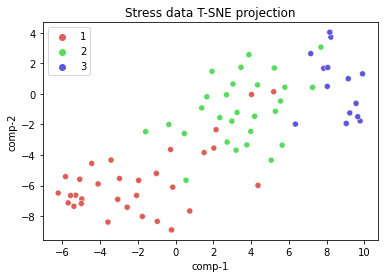

In [ ]:
from sklearn.manifold import TSNE
from numpy import reshape
import seaborn as sns

x = df[col[:-1]]
y = df.para11

tsne = TSNE(n_components=2, verbose=1, random_state=123)
z = tsne.fit_transform(x) 

df2 = pd.DataFrame()
df2["y"] = y
df2["comp-1"] = z[:,0]
df2["comp-2"] = z[:,1]

sns.scatterplot(x="comp-1", y="comp-2", hue=df2.y.tolist(),
                palette=sns.color_palette("hls", 3),
                data=df2).set(title="Stress data T-SNE projection")

In [ ]:
train, test = train_test_split(df, test_size = 0.3)
trainX = train[col[:-1]]# taking the training data features
trainY=train.para11# output of our training data
trainY=trainY.astype('int')
testX= test[col[:-1]] # taking test data features
testY =test.para11   #output value of test data
trainX.head(5)

,para1,para2,para3,para4,para5,para6,para7,para8,para9,para10
16,2,2,2,2,2,1,3,2,3,2
86,2,1,1,2,2,1,3,1,1,1
23,2,1,2,2,2,2,3,2,1,2
40,1,1,2,2,1,1,3,1,1,1
18,2,2,2,2,1,1,3,2,1,2


In [ ]:
C = 1.0 # SVM regularization parameter
svc = svm.SVC(kernel='rbf', C=C,gamma='auto', random_state=0).fit(trainX,trainY)

In [ ]:
predY = svc.predict(testX)

In [ ]:
print(list(testY))
print(list(predY))

[1, 2, 2, 1, 2, 1, 1, 2, 2, 3, 2, 2, 2, 1, 1, 2, 2, 1, 1, 1, 3, 1, 2, 3, 1, 1, 2, 1, 3, 2, 1]
[1, 1, 2, 1, 2, 1, 1, 2, 2, 3, 2, 2, 2, 1, 1, 2, 2, 1, 1, 1, 3, 1, 2, 3, 1, 1, 2, 1, 3, 2, 2]


In [ ]:
print("Actual : ",end="\t")
for x in testY:
  if x==1:
    print("Low",end="\t")
  if x==2:
    print("Medium",end="\t")
  if x==3:
    print("High",end="\t")
print("\nPredicted : ",end="\t")   
for x in predY:
  if x==1:
    print("Low",end="\t")
  if x==2:
    print("Medium",end="\t")
  if x==3:
    print("High",end="\t")

Actual : 	Low	Medium	Medium	Low	Medium	Low	Low	Medium	Medium	High	Medium	Medium	Medium	Low	Low	Medium	Medium	Low	Low	Low	High	Low	Medium	High	Low	Low	Medium	Low	High	Medium	Low	
Predicted : 	Low	Low	Medium	Low	Medium	Low	Low	Medium	Medium	High	Medium	Medium	Medium	Low	Low	Medium	Medium	Low	Low	Low	High	Low	Medium	High	Low	Low	Medium	Low	High	Medium	Medium	

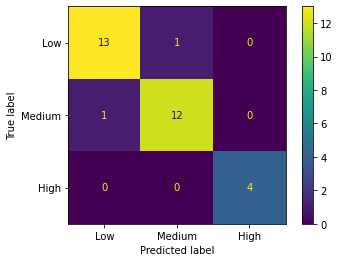

In [ ]:
cm= confusion_matrix(testY, predY)
# plot_confusion_matrix(cm,display_labels=['Low','Medium','High'])
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = ['Low','Medium','High'])

cm_display.plot()
plt.show()

In [ ]:
print('Accuracy of the SVM Classifier is:',metrics.accuracy_score(predY,testY))

Accuracy of the SVM Classifier is: 0.9354838709677419
